<h1 style="text-align: center">Perceptron Learning Algorithm</h1>

In [1]:
import numpy as np

In [19]:
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

In [3]:
y = np.array(X[:, 0] | X[:, 1])

In [4]:
y

array([0, 1, 1, 1])

In [21]:
class PLA:
    def __init__(self, learning_rate = 0.01, max_iterations = 1000, activation = "sigmoid"):
        self.lr = learning_rate
        self.max_iterations = max_iterations
        
        if activation == "relu":
            self.activation = self._relu
            self.grad_act = self.grad_relu
        else:
            self.activation = self._sigmoid
            self.grad_act = self.grad_sigmoid
        self.weight = None
        self.bias = None
    
    def _relu(self, z):
        return max(0, z)

    def grad_relu(self, z):
        return 1 if z > 0 else 0
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def grad_sigmoid(self, z):
        sig = self._sigmoid(z)
        return sig * (1 - sig)
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weight = np.random.rand(n_features)
        self.bias = np.random.rand(1)
        
        for i in range(self.max_iterations):
            # SGD
            for idx, data in enumerate(X):
                z = self.weight.T @ data + self.bias
                z = self.activation(z)
                loss = (y[idx] - z) / (z - z**2)
                self.weight -= self.lr * loss * self.grad_act(z) * data
                self.bias -= self.lr * loss * self.grad_act(z)
                
    def predict(self, X):
        X = np.reshape(X, (-1, X.shape[1]))
        return self.weight @ X.T + self.bias
                

In [22]:
pla = PLA( activation = "sigmoid")

In [23]:
pla.fit(X, y)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14908\4102051913.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14908\4102051913.py:39: RuntimeWarning: invalid value encountered in divide
  loss = (y[idx] - z) / (z - z**2)


In [15]:
X_min, X_max = -2, 2
y_min, y_max = -2, 2

xx, yy = np.meshgrid(np.arange(X_min, X_max, .01), np.arange(y_min, y_max, .01))
z = pla.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)

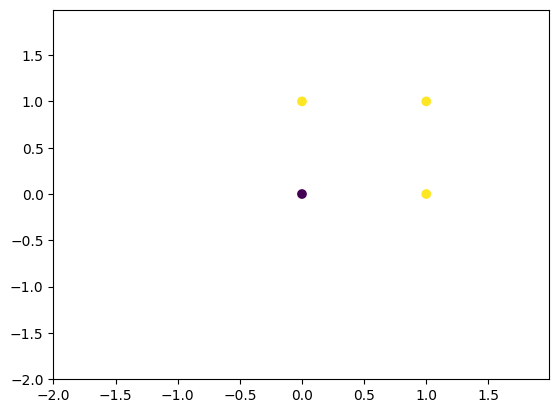

In [16]:
plt.contourf(xx, yy, z)
plt.scatter(X[:, 0], X[:, 1], c = y)

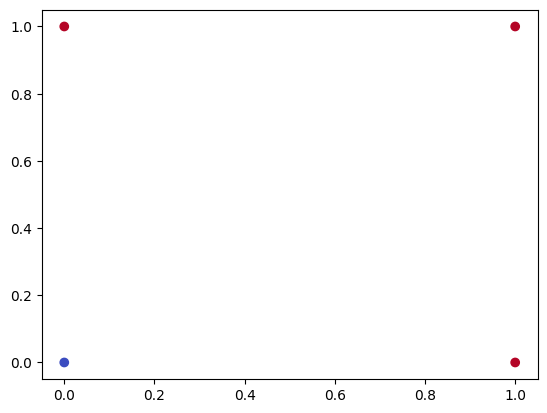

In [17]:
xx_1 = np.arange(X_min, X_max, .01)
z = - (pla.bias + pla.weight[-1] * xx_1) / pla.weight[1]

plt.plot(xx_1, z)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")

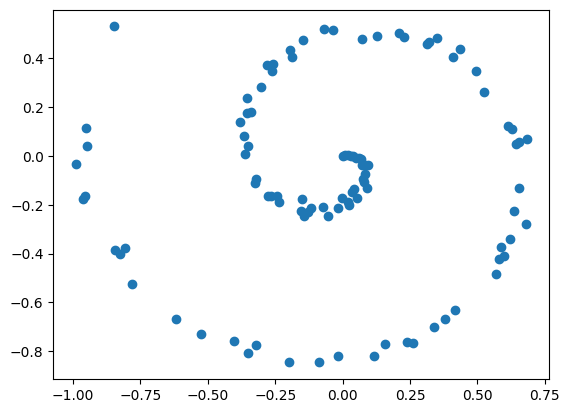

In [13]:
n_samples = 100
n_features = 2
r = np.linspace(.0, 1, n_samples)
t = np.linspace(2 * 10, 3 * 10, n_samples) + np.random.randn(n_samples) * 0.2
X = np.c_[r * np.sin(t), r * np.cos(t)]
plt.scatter(X[:, 0], X[:, 1])

In [14]:
r * np.sin(t)

array([ 0.        ,  0.00937202,  0.02005679,  0.03030097,  0.04040355,
        0.04986681,  0.0600477 ,  0.06970922,  0.07213522,  0.08347644,
        0.09346489,  0.08184887,  0.07605627,  0.07797862,  0.04196218,
        0.03393056,  0.09079947, -0.00383061,  0.05440265,  0.0196101 ,
        0.02503033, -0.01627022, -0.07344166, -0.15122919, -0.11636224,
       -0.05548402, -0.12865899, -0.15261094, -0.14238614, -0.24150112,
       -0.23541312, -0.2666094 , -0.27734822, -0.31990283, -0.3255039 ,
       -0.35140227, -0.36355844, -0.36493575, -0.33890534, -0.35314987,
       -0.38007786, -0.30380734, -0.35270254, -0.26167012, -0.18887148,
       -0.25842791, -0.2817686 , -0.19600509,  0.07211171, -0.14578328,
        0.12664997, -0.03639823, -0.06984196,  0.22707177,  0.20918761,
        0.31270402,  0.32084817,  0.40847255,  0.52540751,  0.34925573,
        0.4963535 ,  0.43488667,  0.61400776,  0.62718485,  0.64453092,
        0.65425138,  0.65354572,  0.63738397,  0.68354569,  0.58

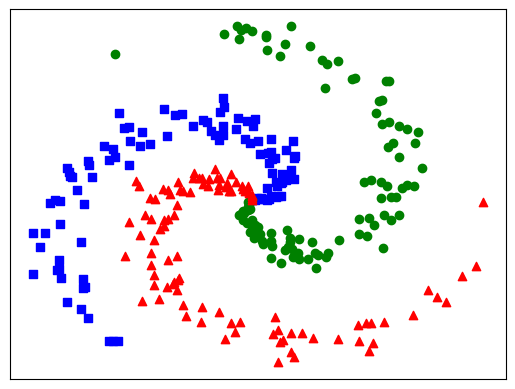

In [35]:
n_samples = 100
n_features = 2
n_class = 3
X = np.zeros((n_samples * n_class, n_features))

cur = 4

for i in range(n_class):
    # Radius 
    r = np.linspace(.0, .5, n_samples)
    t = np.linspace(i * cur, (i + 1) * cur, n_samples) + np.random.randn(n_samples) * 0.25
    idx = np.arange(i * n_samples, (i + 1) * n_samples)
    X[idx, :] = np.c_[r * np.cos(t), r * np.sin(t)]

    
for idx, (marker, color) in enumerate(zip(["s", "o", "^"], ["b", "g", "r"])):
    plt.scatter(X[idx * n_samples:(idx + 1)* n_samples, 0], X[idx * n_samples:(idx + 1) * n_samples, 1] ,marker = marker, c = color)
    
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('EX.png', bbox_inches='tight', dpi = 600)


In [41]:
def relu(X):
    return np.where(X >= 0, X, 0)

def grad_relu(X):
    return np.where(X > 0, 1, 0)

def softmax(X):
    sum_exp = np.sum(np.exp(X))
    return np.exp(X) / sum_exp

class MultiPerceptron:
    def __init__(self, max_iterations = 1000, learning_rate = 0.01):
        self.lr = learning_rate
        self.max_iterations = max_iterations
        
        # Specifies n_class = 3
        # Specifies n_features = 2
        self.weight_1 = None
        self.weight_2 = None
        
        self.bias_1 = None
        self.bias_2 = None
        
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weight_1 = np.random.rand(2, 2)
        self.weight_2 = np.random.randn(2, 3)
        
        self.bias_1 = np.random.randn(2, 1)
        self.bias_2 = np.random.randn(3, 1)
        
        for i in range(self.max_iterations):
            loss = 0
            
            for idx, data in enumerate(X):
                
                # Feedforward
                z1 = self.weight_1.T @ data.T + self.bias_1
                a1 = relu(z1)
                
                z2 = self.weight_2.T @ a1.T + self.bias_2
                yhat = softmax(z2)
            
                loss -= y[idx] * np.log(yhat)
                
                # Backpropagation
                e2 = y[idx] / yhat
                e1 = (self.weight_2 @ e2) * grad_relu(z1)
                
                self.bias_2 -= self.lr * e2
                self.weight_2 -= self.lr * (a1 @ e2.T)
                self.bias_1 -= self.lr * e1
                self.weight_1 -= self.lr * (data @ e1)
            
                
            loss /= n_samples
            if i % 100  == 0:
                print(f"Loss {loss}")
                    

In [42]:
mlp = MultiPerceptron()

In [43]:
n_samples = 100
y = np.r_[[[1, 0, 0]] * n_samples, [[0, 1, 0]] * n_samples, [[0, 0, 1]] * n_samples]

In [44]:
idx = np.random.permutation(3 * n_samples)

X, y = X[idx], y[idx]

In [45]:
mlp.fit(X, y)

ValueError: operands could not be broadcast together with shapes (3,) (3,2) 